In [21]:
import sys

sys.path.append("../../src")

In [22]:
import numpy as np
import gaussian_overlap
import importlib
import h5py
import pandas as pd

from scipy.optimize import minimize

importlib.reload(gaussian_overlap)
from gaussian_overlap import *

In [23]:
df = pd.read_csv("../make_base/sto_3g.csv")
df

,exps_1,coefs_1s,exps_2,coefs_2s,coefs_2p
0,0.109987,0.445576,0.074759,0.694673,0.387976
1,0.407154,0.535362,0.229124,0.405616,0.608867
2,2.246014,0.153482,0.979606,-0.100240,0.158557


In [24]:
def energy(r):
    zetaH = 1.24
    param1 = {
        "center": np.array([0, 0, 0]),
        "lmn": (0, 0, 0),
        "exps": np.array(df["exps_1"]) * zetaH**2,
        "coefs": np.array(df["coefs_1s"]),
    }
    param2 = {
        "center": np.array([r, 0, 0]),
        "lmn": (0, 0, 0),
        "exps": np.array(df["exps_1"]) * zetaH**2,
        "coefs": np.array(df["coefs_1s"]),
    }
    a = BasisFunction(**param1)
    b = BasisFunction(**param2)
    eaa1 = T(a, a) - V(a, a, np.array([0, 0, 0])) - V(a, a, np.array([r, 0, 0]))
    eab1 = T(a, b) - V(a, b, np.array([0, 0, 0])) - V(a, b, np.array([r, 0, 0]))
    ebb1 = T(b, b) - V(b, b, np.array([0, 0, 0])) - V(b, b, np.array([r, 0, 0]))
    eaa2 = ERI(a, a, a, a) + 2 * ERI(a, a, a, b) + ERI(a, a, b, b)
    eab2 = ERI(a, b, a, a) + 2 * ERI(a, b, a, b) + ERI(a, b, b, b)
    ebb2 = ERI(b, b, a, a) + 2 * ERI(b, b, a, b) + ERI(b, b, b, b)
    norm = S(a, a) + 2 * S(a, b) + S(b, b)
    return (
        2 * (eaa1 + 2 * eab1 + ebb1) / norm + (eaa2 + 2 * eab2 + ebb2) / norm**2 + 1 / r
    )

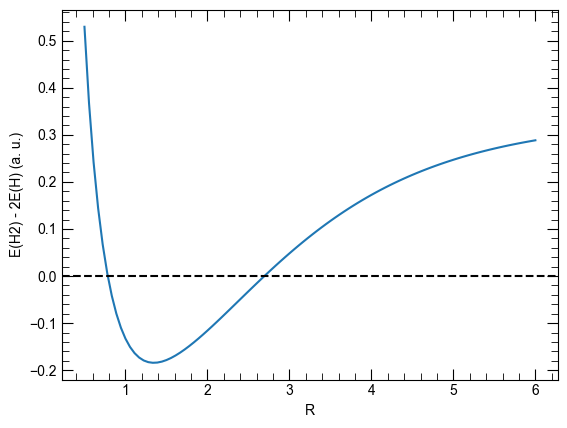

In [25]:
r = np.linspace(0.5, 6, 100)
e = np.array([energy(i) for i in r])
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(r, e + 2 * 0.4666)
ax.axhline(0, color="black", linestyle="--")
ax.set_xlabel("R")
ax.set_ylabel("E(H2) - 2E(H) (a. u.)")
fig.savefig("energy.pdf")